In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# Load the data, keep values of "NONE"
df = pd.read_csv('C:/Users/12034/OneDrive/Documents/WGU/D208_medical_raw.csv', keep_default_na=False)

In [3]:
#Rename survey response variables
df.rename(columns = {
    'Item1':'Timely_admission',
    'Item2':'Timely_treatment',
    'Item3':'Timely_visits',
    'Item4':'Reliability',
    'Item5':'Options',
    'Item6':'Hours_of_treament',
    'Item7':'Courteous_staff',
    'Item8':'Active_listening'},
    inplace=True)

In [4]:
# Summarize the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [5]:
# Assess for duplicates
print(df.duplicated().value_counts())

False    10000
Name: count, dtype: int64


In [6]:
# Assess for missing values
df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [7]:
# Store quantitative variables
medical_quant=df.select_dtypes(include=[np.number])

<Axes: >

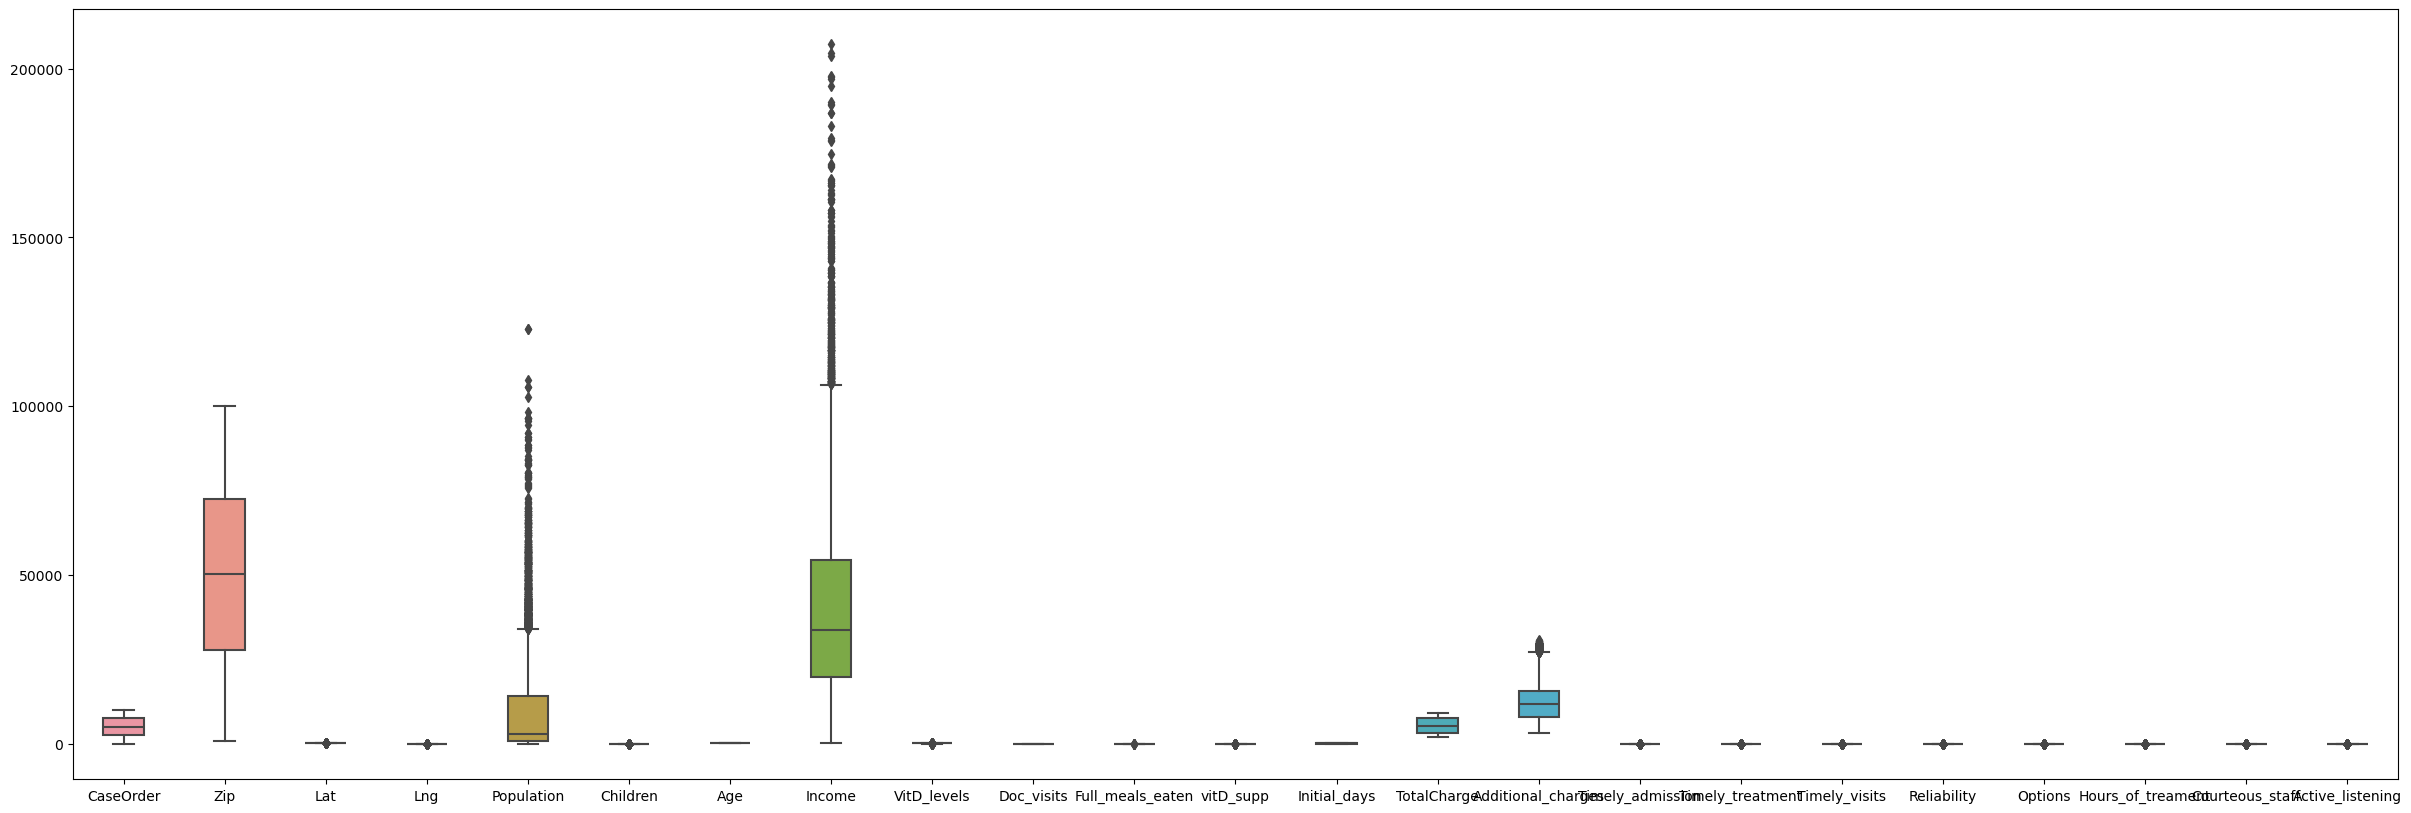

In [8]:
# Create seaborn boxplots of quantitative variables
plt.subplots(figsize=(30, 10))
sns.boxplot(data=medical_quant, width=0.4)

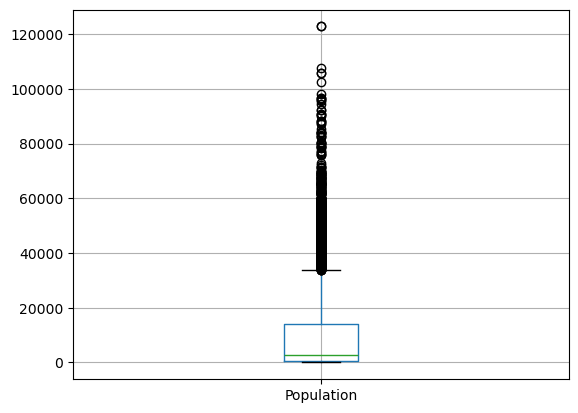

In [9]:
# Create boxplots for variables with outliers: Population, Income, & Additional_charges
# Start by creating boxplot of Population
population_bp=df.boxplot(column=['Population'])

In [10]:
pop_query = df.query('Population > 35000')
pop_query.info()

<class 'pandas.core.frame.DataFrame'>
Index: 805 entries, 8 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           805 non-null    int64  
 1   Customer_id         805 non-null    object 
 2   Interaction         805 non-null    object 
 3   UID                 805 non-null    object 
 4   City                805 non-null    object 
 5   State               805 non-null    object 
 6   County              805 non-null    object 
 7   Zip                 805 non-null    int64  
 8   Lat                 805 non-null    float64
 9   Lng                 805 non-null    float64
 10  Population          805 non-null    int64  
 11  Area                805 non-null    object 
 12  TimeZone            805 non-null    object 
 13  Job                 805 non-null    object 
 14  Children            805 non-null    int64  
 15  Age                 805 non-null    int64  
 16  Income      

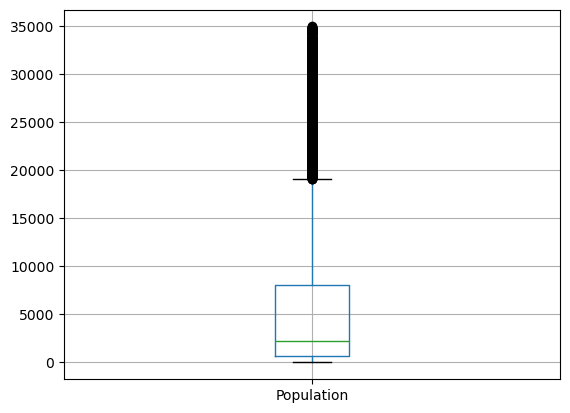

In [11]:
# Replace outliers with nulls
df['Population']=np.where(df['Population']>35000,np.nan,df['Population'])

# Impute nulls with median
df['Population'].fillna(df['Population'].median(), inplace=True)

#Confirm values are below 35000
population_bp=df.boxplot(column=['Population'])

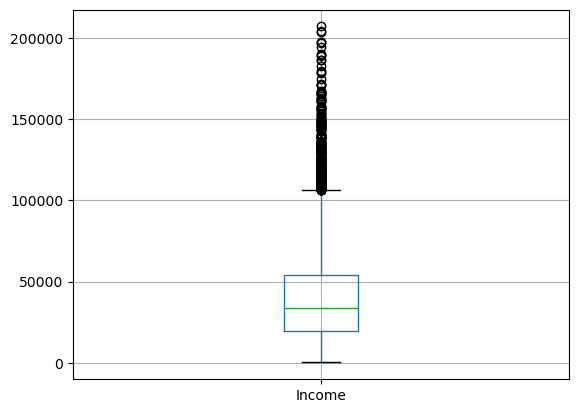

In [12]:
# Create boxplot of Income
income_bp=df.boxplot(column=['Income'])

In [13]:
income_query = df.query('Income > 110000')
income_query.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274 entries, 30 to 9955
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           274 non-null    int64  
 1   Customer_id         274 non-null    object 
 2   Interaction         274 non-null    object 
 3   UID                 274 non-null    object 
 4   City                274 non-null    object 
 5   State               274 non-null    object 
 6   County              274 non-null    object 
 7   Zip                 274 non-null    int64  
 8   Lat                 274 non-null    float64
 9   Lng                 274 non-null    float64
 10  Population          274 non-null    float64
 11  Area                274 non-null    object 
 12  TimeZone            274 non-null    object 
 13  Job                 274 non-null    object 
 14  Children            274 non-null    int64  
 15  Age                 274 non-null    int64  
 16  Income     

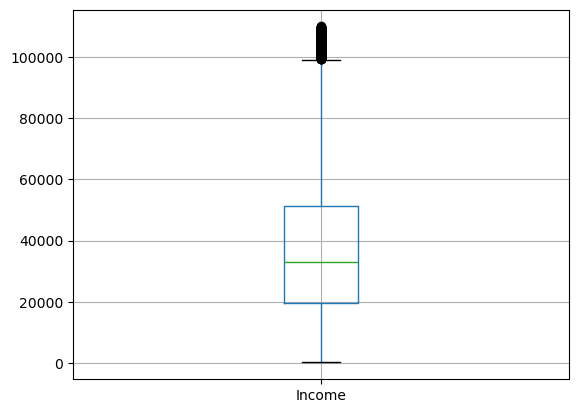

In [14]:
# Replace outliers with nulls
df['Income']=np.where(df['Income']>110000,np.nan,df['Income'])

# Impute nulls with median
df['Income'].fillna(df['Income'].median(), inplace=True)

# Confirm values are below 110000
income_bp=df.boxplot(column=['Income'])

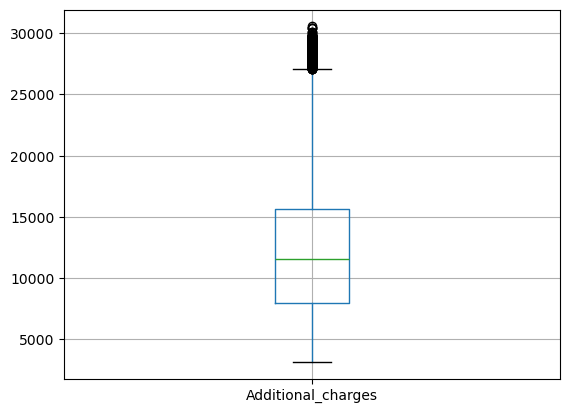

In [15]:
# Create boxplot of Additional_charges
addcharges_bp=df.boxplot(column=['Additional_charges'])

In [16]:
add_query = df.query('Additional_charges > 27000')
add_query.info()

<class 'pandas.core.frame.DataFrame'>
Index: 432 entries, 20 to 9996
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           432 non-null    int64  
 1   Customer_id         432 non-null    object 
 2   Interaction         432 non-null    object 
 3   UID                 432 non-null    object 
 4   City                432 non-null    object 
 5   State               432 non-null    object 
 6   County              432 non-null    object 
 7   Zip                 432 non-null    int64  
 8   Lat                 432 non-null    float64
 9   Lng                 432 non-null    float64
 10  Population          432 non-null    float64
 11  Area                432 non-null    object 
 12  TimeZone            432 non-null    object 
 13  Job                 432 non-null    object 
 14  Children            432 non-null    int64  
 15  Age                 432 non-null    int64  
 16  Income     

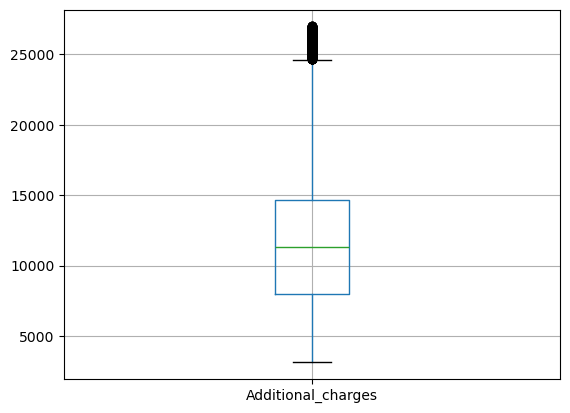

In [17]:
# Replace outliers with nulls
df['Additional_charges']=np.where(df['Additional_charges']>27000,np.nan,df['Additional_charges'])

# Impute nulls with median
df['Additional_charges'].fillna(df['Additional_charges'].median(), inplace=True)

#Confirm values are below 27000
addcharges_bp=df.boxplot(column=['Additional_charges'])

In [18]:
#'Timely_treatment' & 'Active_listening' variables are expressed numerically
# I want to transform the 1-8 scale to least-to-most important
# First will replicate the variables
df['Timely_treatment_new'] = df['Timely_treatment']
df['Active_listening_new'] = df['Active_listening']

In [19]:
# Set up dictionary to switch scale
dict_treatment = {"Timely_treatment_new": {1:8, 2:7, 3:6, 4:5, 5:4, 6:3, 7:2, 8:1}}
dict_listening = {"Active_listening_new": {1:8, 2:7, 3:6, 4:5, 5:4, 6:3, 7:2, 8:1}}

In [20]:
# Replace variables using dictionary
df.replace(dict_treatment, inplace=True)
df.replace(dict_listening, inplace=True)

In [21]:
# Verify re-expression with frequency tables
df['Timely_treatment'].value_counts(normalize=True)

Timely_treatment
3    0.3439
4    0.3351
5    0.1421
2    0.1360
1    0.0213
6    0.0204
7    0.0012
Name: proportion, dtype: float64

In [22]:
df['Timely_treatment_new'].value_counts(normalize=True)

Timely_treatment_new
6    0.3439
5    0.3351
4    0.1421
7    0.1360
8    0.0213
3    0.0204
2    0.0012
Name: proportion, dtype: float64

In [23]:
df['Active_listening'].value_counts(normalize=True)

Active_listening
3    0.3401
4    0.3337
5    0.1429
2    0.1391
6    0.0221
1    0.0209
7    0.0012
Name: proportion, dtype: float64

In [24]:
df['Active_listening_new'].value_counts(normalize=True)

Active_listening_new
6    0.3401
5    0.3337
4    0.1429
7    0.1391
3    0.0221
8    0.0209
2    0.0012
Name: proportion, dtype: float64

In [25]:
# Check summary of data again, confirm new variables are included
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  float64
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [26]:
# Create new data frame with relevant columns
df = df[[
    'Initial_days',
    'Children',
    'Age',
    'Income',
    'VitD_levels',
    'Doc_visits',
    'Full_meals_eaten',
    'TotalCharge',
    'Additional_charges',
    'Timely_treatment_new',
    'Active_listening_new',
    'Complication_risk', 
    'Asthma']]

In [27]:
#Summary statistics of continuous variables
df.describe()

,Initial_days,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,TotalCharge,Additional_charges,Timely_treatment_new,Active_listening_new
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,34.455299,2.097200,53.511700,37717.986900,17.964262,5.012200,1.001400,5312.172769,12199.658920,5.493300,5.490300
std,26.309341,2.163659,20.638538,23547.400893,2.017231,1.045734,1.008117,2180.393838,5670.050042,1.034825,1.042312
min,1.001981,0.000000,18.000000,154.080000,9.806483,1.000000,0.000000,1938.312067,3125.703000,2.000000,2.000000
25%,7.896215,0.000000,36.000000,19598.775000,16.626439,4.000000,0.000000,3179.374015,7986.487755,5.000000,5.000000
50%,35.836244,1.000000,53.000000,32888.840000,17.951122,5.000000,1.000000,5213.952000,11293.773115,6.000000,6.000000
75%,61.161020,3.000000,71.000000,51401.530000,19.347963,6.000000,2.000000,7459.699750,14644.120000,6.000000,6.000000
max,71.981490,10.000000,89.000000,109948.460000,26.394449,9.000000,7.000000,9180.728000,26986.140460,8.000000,8.000000


In [28]:
#Summary statistics of categorical variables
#1. Complication risk
df['Complication_risk'].value_counts(normalize=True)

Complication_risk
Medium    0.4517
High      0.3358
Low       0.2125
Name: proportion, dtype: float64

In [29]:
#2. Asthma
df['Asthma'].value_counts(normalize=True)

Asthma
No     0.7107
Yes    0.2893
Name: proportion, dtype: float64

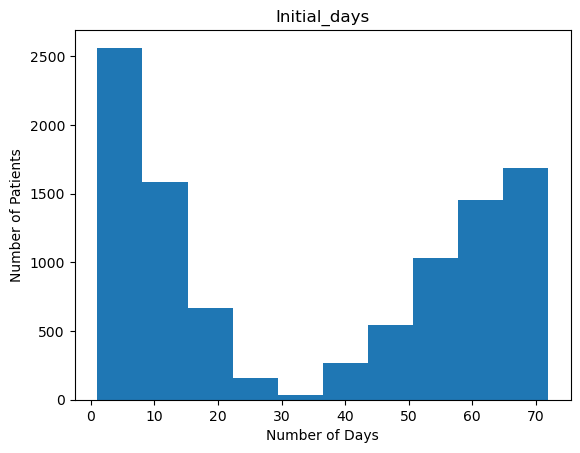

In [30]:
#Univariate statistics - Target variable (Initial days)
plt.hist(df.Initial_days)
plt.title('Initial_days')
plt.xlabel('Number of Days')
plt.ylabel('Number of Patients')
plt.show()

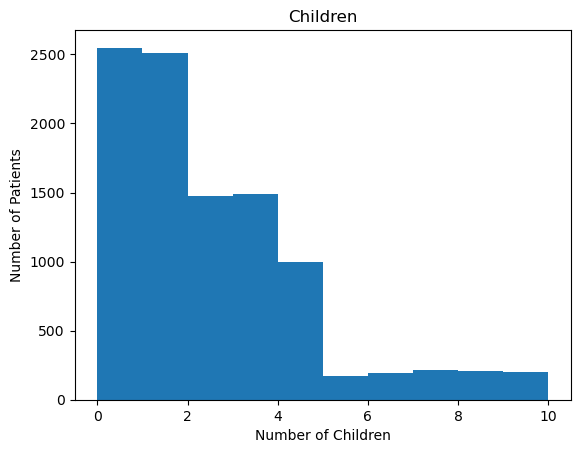

In [31]:
#Univariate statistics - 12 Predictor variables
#1. Children
plt.hist(df.Children)
plt.title('Children')
plt.xlabel('Number of Children')
plt.ylabel('Number of Patients')
plt.show()

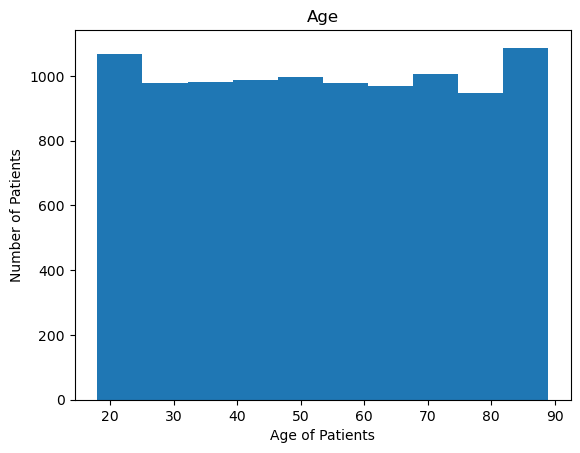

In [32]:
#2. Age
plt.hist(df.Age)
plt.title('Age')
plt.xlabel('Age of Patients')
plt.ylabel('Number of Patients')
plt.show()

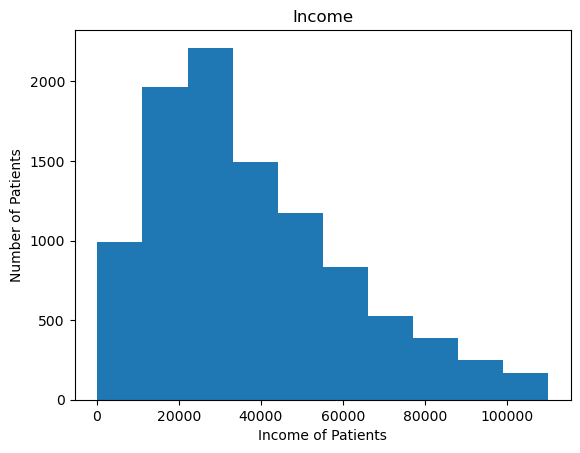

In [33]:
#3. Income
plt.hist(df.Income)
plt.title('Income')
plt.xlabel('Income of Patients')
plt.ylabel('Number of Patients')
plt.show()

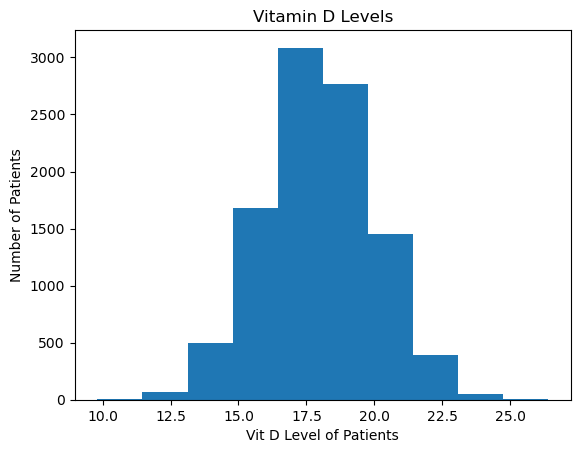

In [34]:
#4. Vitamin D levels
plt.hist(df.VitD_levels)
plt.title('Vitamin D Levels')
plt.xlabel('Vit D Level of Patients')
plt.ylabel('Number of Patients')
plt.show()

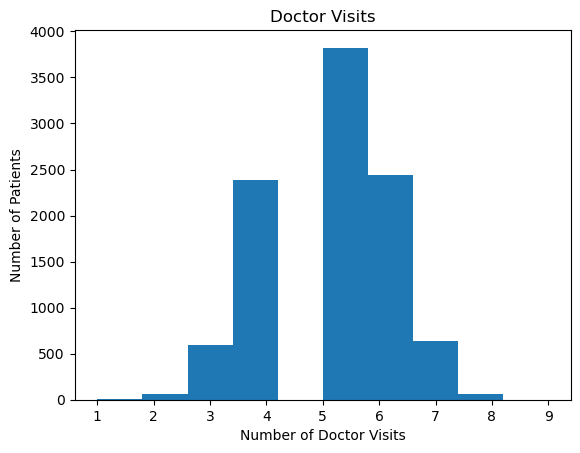

In [35]:
#5. Doctor visits
plt.hist(df.Doc_visits)
plt.title('Doctor Visits')
plt.xlabel('Number of Doctor Visits')
plt.ylabel('Number of Patients')
plt.show()

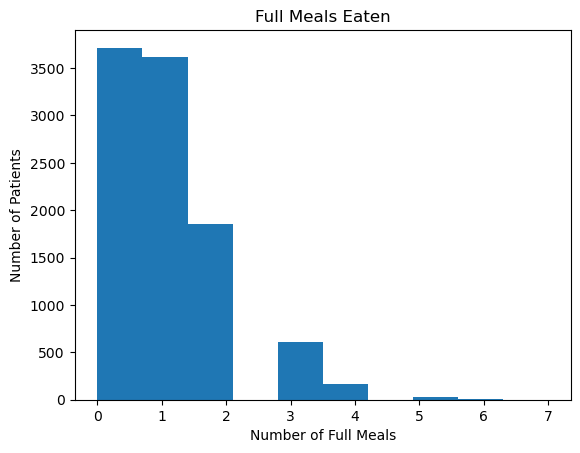

In [36]:
#6. Fulls meals
plt.hist(df.Full_meals_eaten)
plt.title('Full Meals Eaten')
plt.xlabel('Number of Full Meals')
plt.ylabel('Number of Patients')
plt.show()

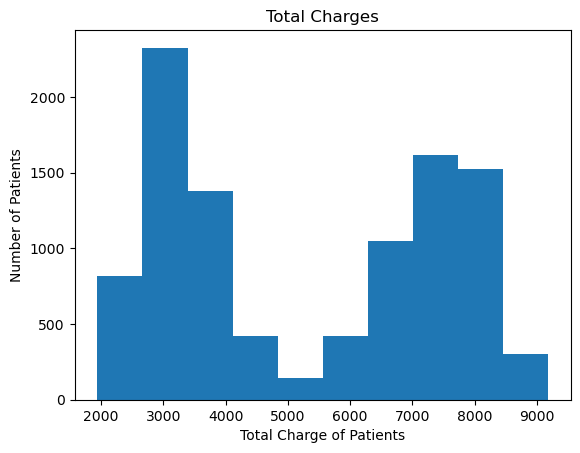

In [37]:
#7. Total charges
plt.hist(df.TotalCharge)
plt.title('Total Charges')
plt.xlabel('Total Charge of Patients')
plt.ylabel('Number of Patients')
plt.show()

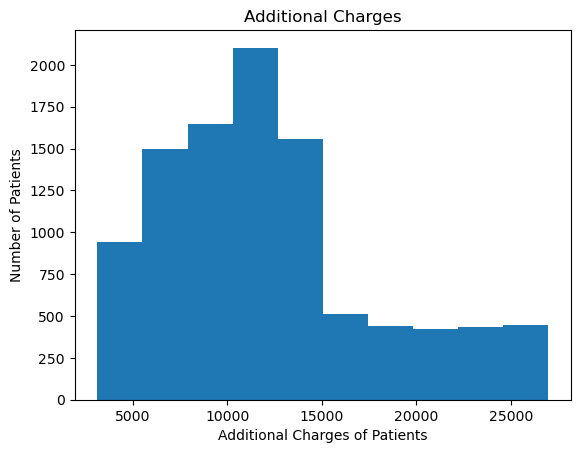

In [38]:
#8. Additional charges
plt.hist(df.Additional_charges)
plt.title('Additional Charges')
plt.xlabel('Additional Charges of Patients')
plt.ylabel('Number of Patients')
plt.show()

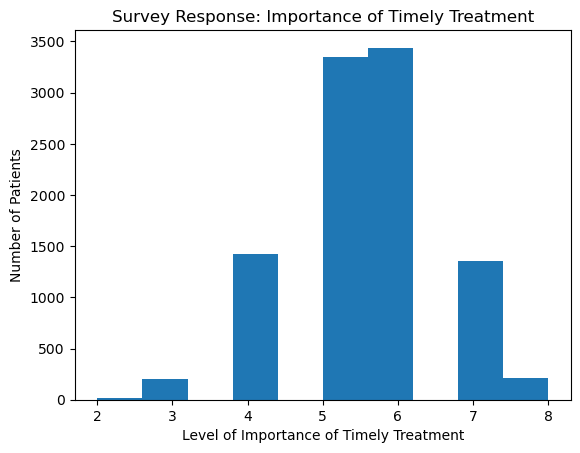

In [39]:
#9. Timely treatments
plt.hist(df.Timely_treatment_new)
plt.title('Survey Response: Importance of Timely Treatment')
plt.xlabel('Level of Importance of Timely Treatment')
plt.ylabel('Number of Patients')
plt.show()

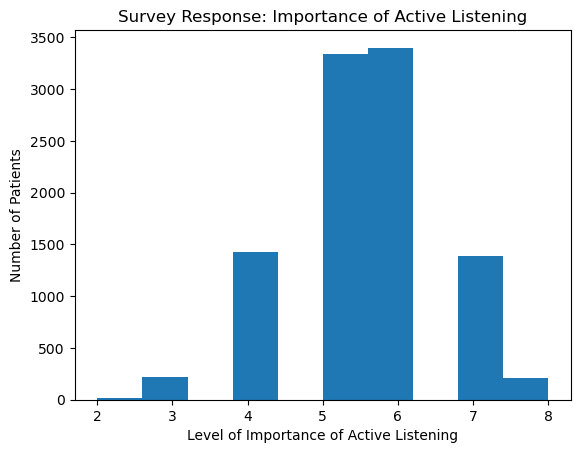

In [40]:
#10. Active Listening
plt.hist(df.Active_listening_new)
plt.title('Survey Response: Importance of Active Listening')
plt.xlabel('Level of Importance of Active Listening')
plt.ylabel('Number of Patients')
plt.show()

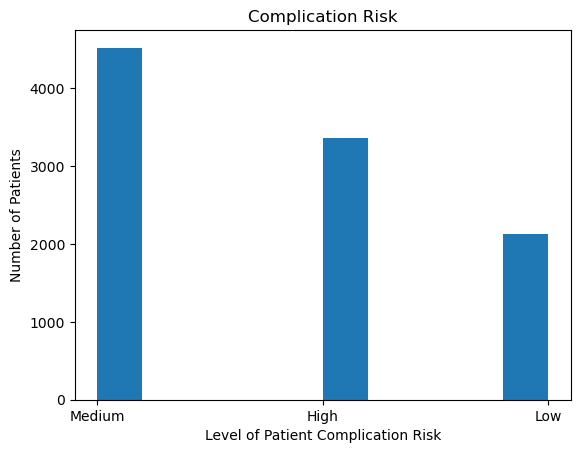

In [41]:
#11. Complication risk
plt.hist(df.Complication_risk)
plt.title('Complication Risk')
plt.xlabel('Level of Patient Complication Risk')
plt.ylabel('Number of Patients')
plt.show()

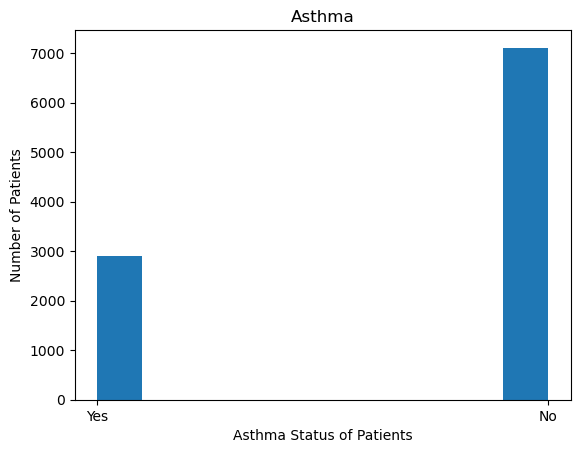

In [42]:
#12. Asthma
plt.hist(df.Asthma)
plt.title('Asthma')
plt.xlabel('Asthma Status of Patients')
plt.ylabel('Number of Patients')
plt.show()

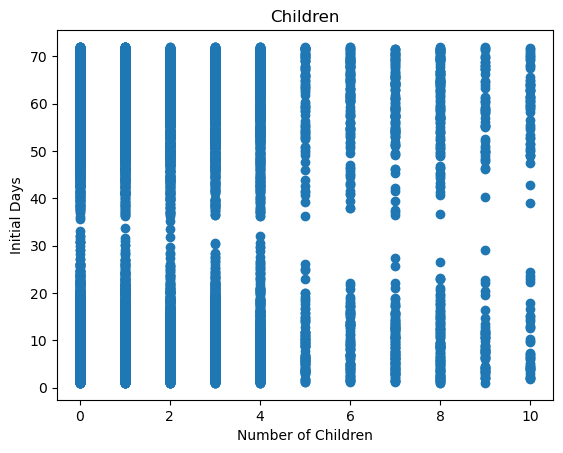

In [43]:
#Bivariate of 12 predictor variables
# Scatterplots for 10 continuous variables
# 1. Initial days x Children
plt.scatter(df.Children, df.Initial_days)
plt.title('Children')
plt.xlabel('Number of Children')
plt.ylabel('Initial Days')
plt.show()

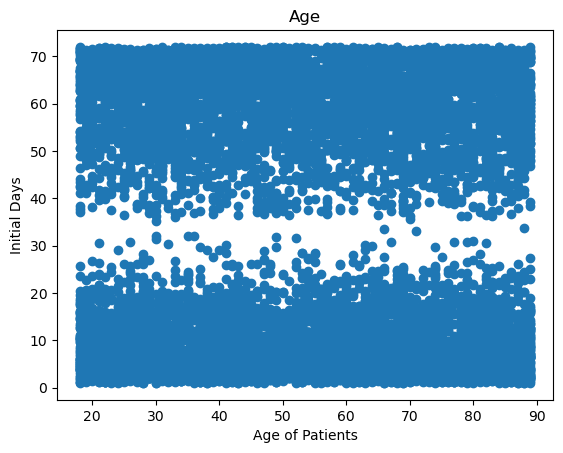

In [44]:
# 2. Initial days x Age
plt.scatter(df.Age, df.Initial_days)
plt.title('Age')
plt.xlabel('Age of Patients')
plt.ylabel('Initial Days')
plt.show()

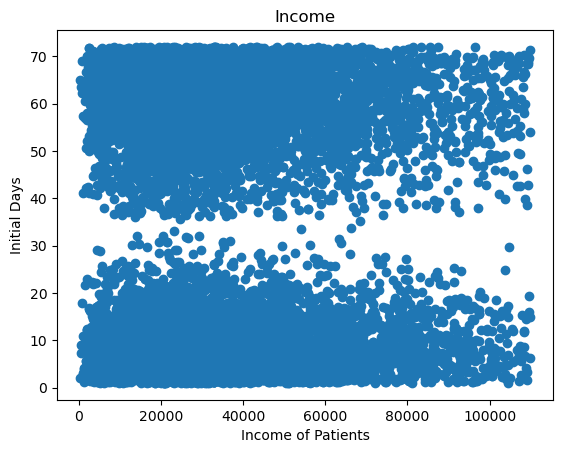

In [45]:
# 3. Initial days x Income
plt.scatter(df.Income, df.Initial_days)
plt.title('Income')
plt.xlabel('Income of Patients')
plt.ylabel('Initial Days')
plt.show()

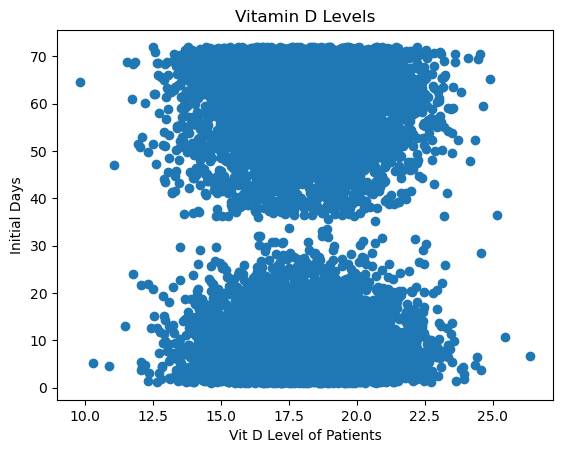

In [46]:
# 4. Initial days x Vitamin D levels
plt.scatter(df.VitD_levels, df.Initial_days)
plt.title('Vitamin D Levels')
plt.xlabel('Vit D Level of Patients')
plt.ylabel('Initial Days')
plt.show()

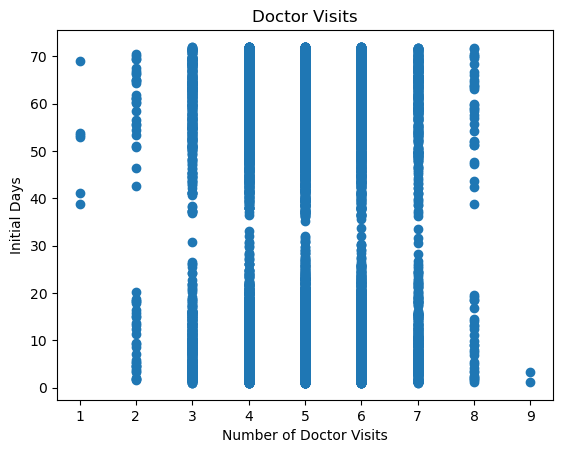

In [47]:
# 5. Initial days x Doctor visits
plt.scatter(df.Doc_visits, df.Initial_days)
plt.title('Doctor Visits')
plt.xlabel('Number of Doctor Visits')
plt.ylabel('Initial Days')
plt.show()

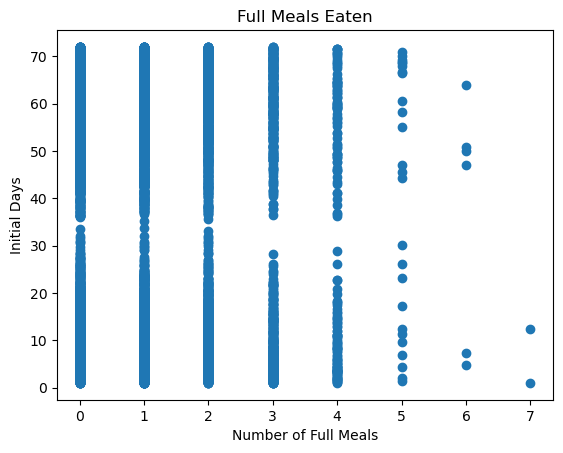

In [48]:
# 6. Initial days x Full meals eaten
plt.scatter(df.Full_meals_eaten, df.Initial_days)
plt.title('Full Meals Eaten')
plt.xlabel('Number of Full Meals')
plt.ylabel('Initial Days')
plt.show()

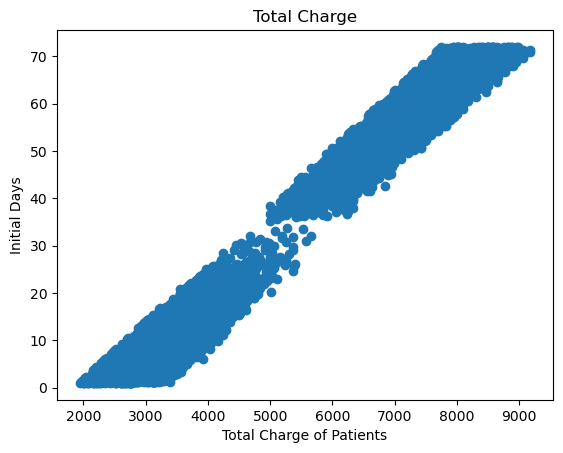

In [49]:
# 7. Initial days x Total Charge
plt.scatter(df.TotalCharge, df.Initial_days)
plt.title('Total Charge')
plt.xlabel('Total Charge of Patients')
plt.ylabel('Initial Days')
plt.show()

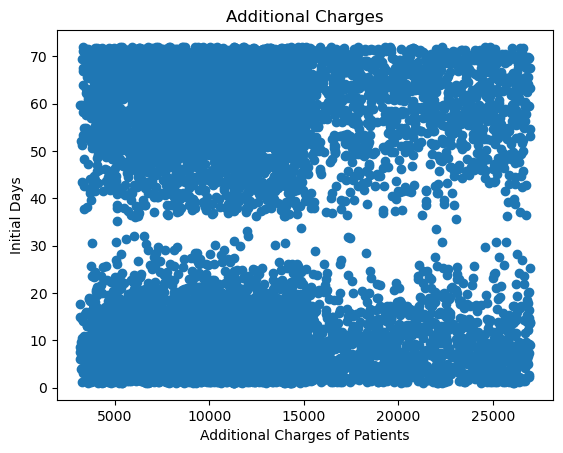

In [50]:
# 8. Initial days x Additional charges
plt.scatter(df.Additional_charges, df.Initial_days)
plt.title('Additional Charges')
plt.xlabel('Additional Charges of Patients')
plt.ylabel('Initial Days')
plt.show()

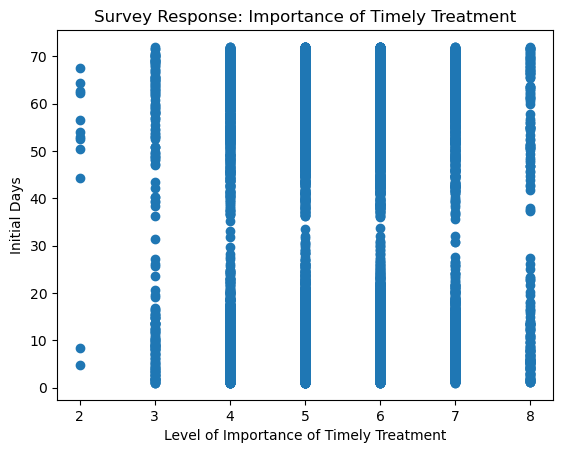

In [51]:
# 9. Initial days x Timely treatment
plt.scatter(df.Timely_treatment_new, df.Initial_days)
plt.title('Survey Response: Importance of Timely Treatment')
plt.xlabel('Level of Importance of Timely Treatment')
plt.ylabel('Initial Days')
plt.show()

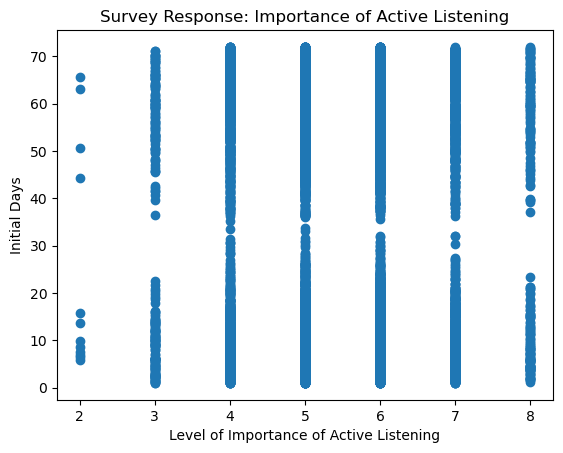

In [52]:
# 9. Initial days x Active listening
plt.scatter(df.Active_listening_new, df.Initial_days)
plt.title('Survey Response: Importance of Active Listening')
plt.xlabel('Level of Importance of Active Listening')
plt.ylabel('Initial Days')
plt.show()

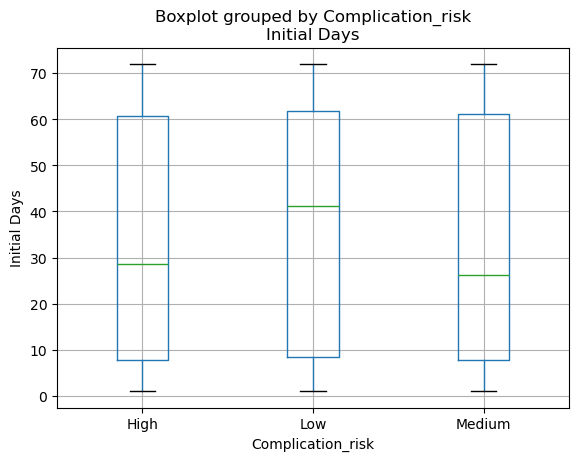

In [53]:
# Boxplots for 2 categorical variables
# 11. Initial days x Complication risk
df.boxplot(column = 'Initial_days', by = 'Complication_risk')
plt.title('Initial Days')
plt.ylabel('Initial Days')
plt.show()

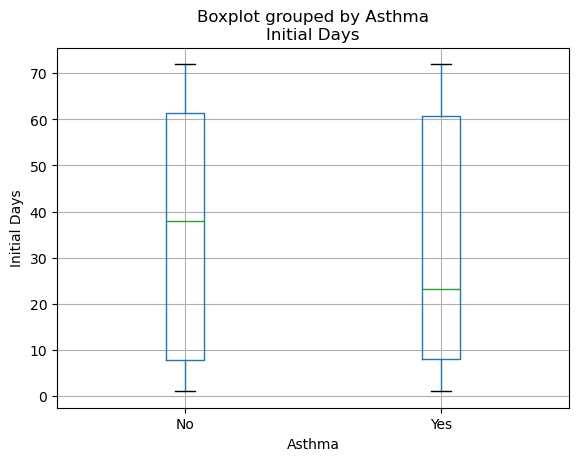

In [54]:
# 12. Initial days x Asthma
df.boxplot(column = 'Initial_days', by = 'Asthma')
plt.title('Initial Days')
plt.ylabel('Initial Days')
plt.show()

In [55]:
# Summary of all model variables to assess if re-expression is needed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Initial_days          10000 non-null  float64
 1   Children              10000 non-null  int64  
 2   Age                   10000 non-null  int64  
 3   Income                10000 non-null  float64
 4   VitD_levels           10000 non-null  float64
 5   Doc_visits            10000 non-null  int64  
 6   Full_meals_eaten      10000 non-null  int64  
 7   TotalCharge           10000 non-null  float64
 8   Additional_charges    10000 non-null  float64
 9   Timely_treatment_new  10000 non-null  int64  
 10  Active_listening_new  10000 non-null  int64  
 11  Complication_risk     10000 non-null  object 
 12  Asthma                10000 non-null  object 
dtypes: float64(5), int64(6), object(2)
memory usage: 1015.8+ KB


In [56]:
# Re-express categorical variables as numeric
df.Complication_risk.replace(('Low', 'Medium', 'High'), (1, 2, 3), inplace=True)
df.Asthma.replace(('Yes', 'No'), (1, 0), inplace=True)

In [57]:
# Confirm re-expression was successful
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Initial_days          10000 non-null  float64
 1   Children              10000 non-null  int64  
 2   Age                   10000 non-null  int64  
 3   Income                10000 non-null  float64
 4   VitD_levels           10000 non-null  float64
 5   Doc_visits            10000 non-null  int64  
 6   Full_meals_eaten      10000 non-null  int64  
 7   TotalCharge           10000 non-null  float64
 8   Additional_charges    10000 non-null  float64
 9   Timely_treatment_new  10000 non-null  int64  
 10  Active_listening_new  10000 non-null  int64  
 11  Complication_risk     10000 non-null  int64  
 12  Asthma                10000 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 1015.8 KB


In [58]:
#Save output to csv file
df.to_csv('C:/Users/12034/OneDrive/Documents/WGU/D208_PA1_MV_clean.csv')

In [59]:
# Initial model
initial_model = ols(
    'Initial_days ~ Children + Age + Income + VitD_levels + Doc_visits + Full_meals_eaten + TotalCharge + Additional_charges + Timely_treatment_new + Active_listening_new + Complication_risk + Asthma',
    data = df).fit()

In [60]:
print(initial_model.params)

Intercept              -22.593432
Children                -0.010448
Age                      0.024255
Income                   0.000002
VitD_levels             -0.023642
Doc_visits              -0.019800
Full_meals_eaten        -0.035123
TotalCharge              0.011980
Additional_charges      -0.000143
Timely_treatment_new     0.052464
Active_listening_new    -0.037546
Complication_risk       -2.691109
Asthma                   0.009133
dtype: float64


In [61]:
print(initial_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 4.470e+04
Date:                Thu, 01 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:56:01   Log-Likelihood:                -26878.
No. Observations:               10000   AIC:                         5.378e+04
Df Residuals:                    9987   BIC:                         5.388e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -22.5934 

In [62]:
# 1. Assess for multicollinearity using VIF for all predictor variables
# VIF code from Dr. Sewell's lecture slides (Episode 1)
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Set independent variable set as X
X = df[['Children','Age','Income','VitD_levels','Doc_visits','Full_meals_eaten','TotalCharge','Additional_charges','Timely_treatment_new','Active_listening_new','Complication_risk', 'Asthma']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_data)

                 feature        VIF
0               Children   1.936149
1                    Age  12.540044
2                 Income   3.510302
3            VitD_levels  44.249170
4             Doc_visits  20.886157
5       Full_meals_eaten   1.985511
6            TotalCharge   6.778559
7     Additional_charges   9.274277
8   Timely_treatment_new  27.812818
9   Active_listening_new  27.837720
10     Complication_risk   9.118225
11                Asthma   1.405565


In [63]:
# 2. Remove variable with highest VIF > 10: Vit D levels
# Check VIF again for remaining variables

X = df[['Children','Age','Income','Doc_visits','Full_meals_eaten','TotalCharge','Additional_charges','Timely_treatment_new','Active_listening_new','Complication_risk', 'Asthma']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]
print(vif_data)

                 feature        VIF
0               Children   1.928596
1                    Age  12.367258
2                 Income   3.478217
3             Doc_visits  18.113749
4       Full_meals_eaten   1.973364
5            TotalCharge   6.622141
6     Additional_charges   9.260344
7   Timely_treatment_new  25.380312
8   Active_listening_new  25.041649
9      Complication_risk   8.777505
10                Asthma   1.401832


In [64]:
# 3. Remove variable with highest VIF > 10: Timely treatment
# Check VIF again for remaining variables

X = df[['Children','Age','Income','Doc_visits','Full_meals_eaten','TotalCharge','Additional_charges','Active_listening_new','Complication_risk', 'Asthma']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]
print(vif_data)

                feature        VIF
0              Children   1.926640
1                   Age  12.303038
2                Income   3.439406
3            Doc_visits  16.866780
4      Full_meals_eaten   1.970037
5           TotalCharge   6.535992
6    Additional_charges   9.250939
7  Active_listening_new  18.255950
8     Complication_risk   8.609021
9                Asthma   1.399302


In [65]:
# 4. Remove variable with highest VIF > 10: Active listening
# Check VIF again for remaining variables

X = df[['Children','Age','Income','Doc_visits','Full_meals_eaten','TotalCharge','Additional_charges','Complication_risk', 'Asthma']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]
print(vif_data)

              feature        VIF
0            Children   1.910170
1                 Age  12.008885
2              Income   3.390358
3          Doc_visits  12.853621
4    Full_meals_eaten   1.950304
5         TotalCharge   6.252202
6  Additional_charges   9.242677
7   Complication_risk   8.130560
8              Asthma   1.394231


In [66]:
# 5. Remove variable with highest VIF > 10: Doctor visits
# Check VIF again for remaining variables

X = df[['Children','Age','Income','Full_meals_eaten','TotalCharge','Additional_charges','Complication_risk', 'Asthma']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]
print(vif_data)

              feature        VIF
0            Children   1.884657
1                 Age  11.359777
2              Income   3.208659
3    Full_meals_eaten   1.918261
4         TotalCharge   5.660295
5  Additional_charges   9.201200
6   Complication_risk   6.815469
7              Asthma   1.387357


In [67]:
# 6. Remove variable with highest VIF > 10: Age
# Check VIF again for remaining variables

X = df[['Children','Income','Full_meals_eaten','TotalCharge','Additional_charges','Complication_risk', 'Asthma']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]
print(vif_data)

              feature       VIF
0            Children  1.877747
1              Income  3.166037
2    Full_meals_eaten  1.911025
3         TotalCharge  5.503307
4  Additional_charges  4.702692
5   Complication_risk  6.573315
6              Asthma  1.384500


In [68]:
# First reduced model with remaining variables
reduced1_model = ols(
'Initial_days ~ Children + Income + Full_meals_eaten + TotalCharge + Additional_charges + Complication_risk + Asthma',
    data = df).fit()

print(reduced1_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 7.571e+04
Date:                Thu, 01 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:56:01   Log-Likelihood:                -26940.
No. Observations:               10000   AIC:                         5.390e+04
Df Residuals:                    9992   BIC:                         5.395e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -22.3870      0

In [69]:
# Second reduced model (remove Asthma)
reduced2_model = ols(
'Initial_days ~ Children + Income + Full_meals_eaten + TotalCharge + Additional_charges + Complication_risk',
    data = df).fit()

print(reduced2_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 8.834e+04
Date:                Thu, 01 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:56:01   Log-Likelihood:                -26940.
No. Observations:               10000   AIC:                         5.389e+04
Df Residuals:                    9993   BIC:                         5.394e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -22.3833      0

In [70]:
# Third reduced model (remove Children)
reduced3_model = ols(
'Initial_days ~ Income + Full_meals_eaten + TotalCharge + Additional_charges + Complication_risk',
    data = df).fit()

print(reduced3_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 1.060e+05
Date:                Thu, 01 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:56:01   Log-Likelihood:                -26940.
No. Observations:               10000   AIC:                         5.389e+04
Df Residuals:                    9994   BIC:                         5.393e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -22.4039      0

In [71]:
# Fourth reduced model (remove Full meals eaten)
reduced4_model = ols(
'Initial_days ~ Income + TotalCharge + Additional_charges + Complication_risk',
    data = df).fit()

print(reduced4_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 1.325e+05
Date:                Thu, 01 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:56:01   Log-Likelihood:                -26940.
No. Observations:               10000   AIC:                         5.389e+04
Df Residuals:                    9995   BIC:                         5.393e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -22.4416      0

In [72]:
# Final model (remove Income)
final_model = ols(
'Initial_days ~ TotalCharge + Additional_charges + Complication_risk',
    data = df).fit()

print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 1.767e+05
Date:                Thu, 01 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:56:02   Log-Likelihood:                -26941.
No. Observations:               10000   AIC:                         5.389e+04
Df Residuals:                    9996   BIC:                         5.392e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -22.3740      0

In [73]:
print(final_model.params)

Intercept            -22.373961
TotalCharge            0.011980
Additional_charges    -0.000087
Complication_risk     -2.704335
dtype: float64


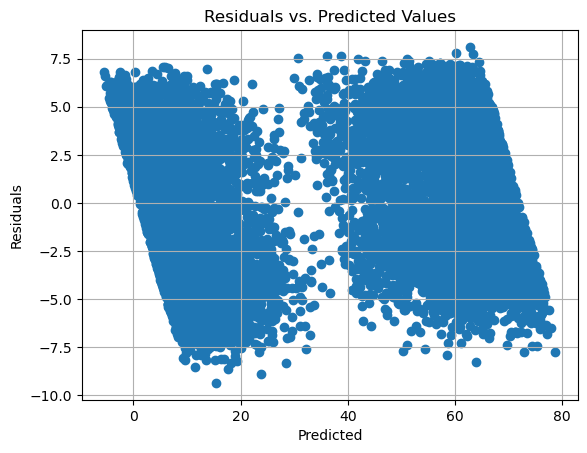

In [74]:
# Scatterplot of residuals vs. predicted values
pred_values = final_model.predict(df[['TotalCharge','Additional_charges','Complication_risk']])
residuals = df['Initial_days'] - pred_values

plt.scatter(pred_values, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.grid(True)
plt.show()

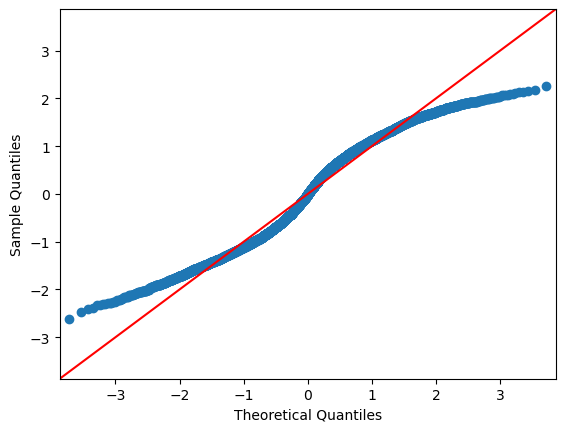

In [75]:
# Residual plot of final model
from statsmodels.api import qqplot
qqplot(data=final_model.resid, fit = True , line = '45')
plt.show()

In [76]:
#Calculate mean squared error & residual standard error for final model
resid = final_model.resid
mse_resid = final_model.mse_resid
print('MSE:', mse_resid)
RSE = np.sqrt(mse_resid)
print('RSE:', RSE)

MSE: 12.816628721896468
RSE: 3.580031944256429
